# Medical Insurance Cost Analysis

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar  
**Date:** July 17, 2025

---

## Objective
Analyze medical insurance costs and explore factors affecting insurance charges.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.style.use('default')
sns.set_palette("husl")
print("Libraries loaded successfully!")

Libraries loaded successfully!


## Load and Explore Data

In [2]:
# Load dataset
df = pd.read_csv('medical_insurance.csv')

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (2772, 7)

First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Dataset info
print("Dataset Information:")
print(df.info())
print("\nStatistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None

Statistical Summary:


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## Data Visualization

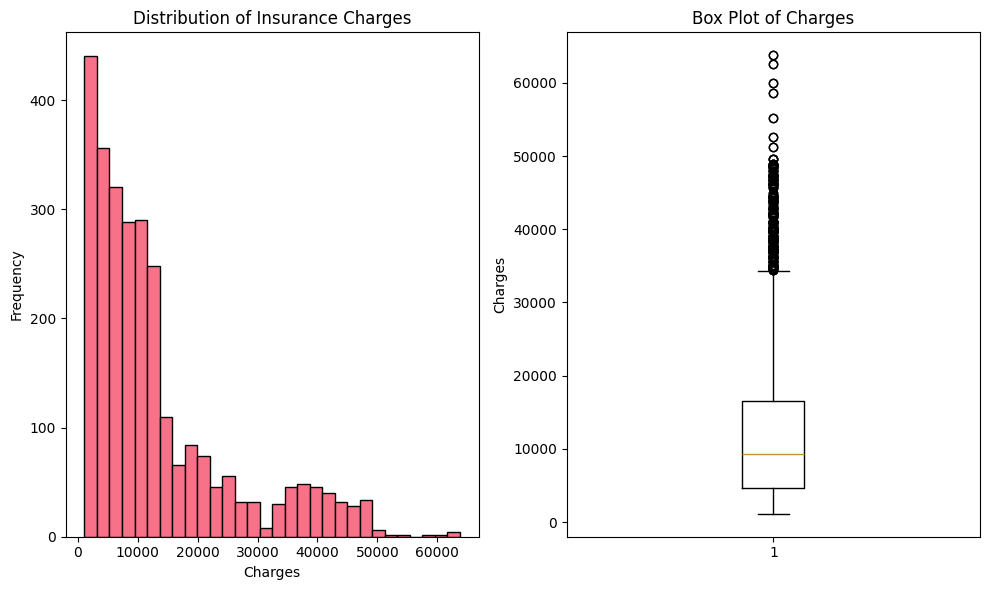

In [5]:
# Distribution of charges
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=30, edgecolor='black')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.title('Box Plot of Charges')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

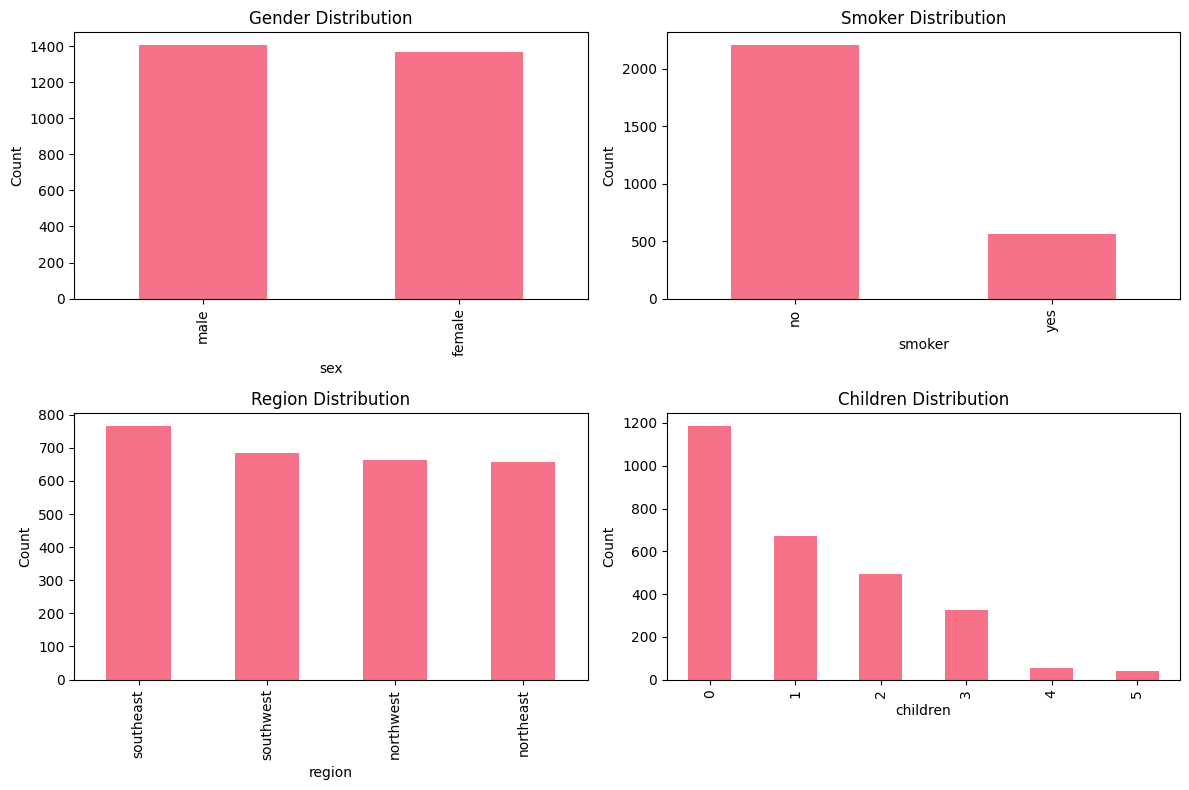

In [6]:
# Categorical variables analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Sex distribution
df['sex'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')
axes[0,0].set_ylabel('Count')

# Smoker distribution
df['smoker'].value_counts().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Smoker Distribution')
axes[0,1].set_ylabel('Count')

# Region distribution
df['region'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Region Distribution')
axes[1,0].set_ylabel('Count')

# Children distribution
df['children'].value_counts().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Children Distribution')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

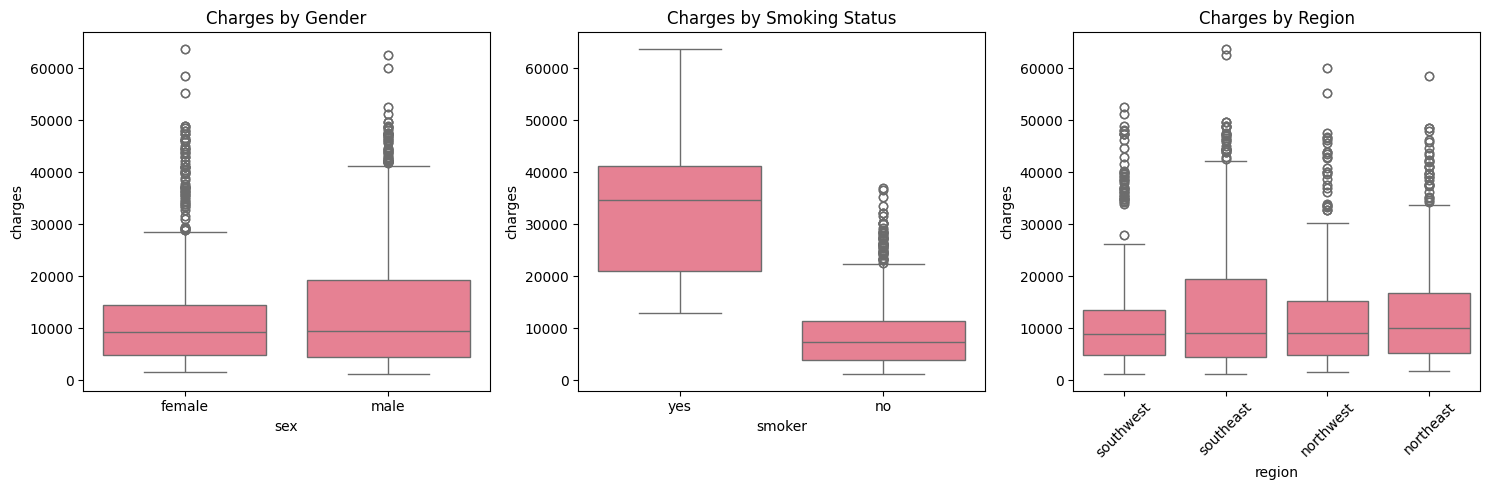

In [7]:
# Charges vs other factors
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

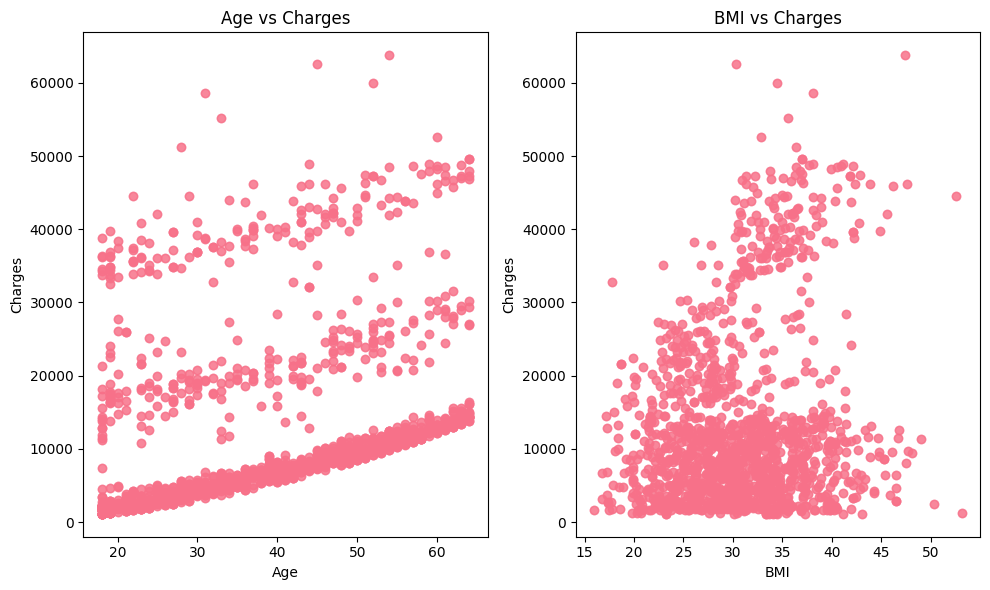

In [8]:
# Correlation analysis
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['age'], df['charges'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')

plt.subplot(1, 2, 2)
plt.scatter(df['bmi'], df['charges'], alpha=0.6)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [9]:
# Create a copy for preprocessing
df_processed = df.copy()

# Encode categorical variables
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_processed['sex_encoded'] = le_sex.fit_transform(df_processed['sex'])
df_processed['smoker_encoded'] = le_smoker.fit_transform(df_processed['smoker'])
df_processed['region_encoded'] = le_region.fit_transform(df_processed['region'])

print("Encoding mappings:")
print(f"Sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"Smoker: {dict(zip(le_smoker.classes_, le_smoker.transform(le_smoker.classes_)))}")
print(f"Region: {dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))}")

Encoding mappings:
Sex: {'female': np.int64(0), 'male': np.int64(1)}
Smoker: {'no': np.int64(0), 'yes': np.int64(1)}
Region: {'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [10]:
# Select features for ML
features = ['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']
X = df_processed[features]
y = df_processed['charges']

print("Features for ML:")
print(X.head())
print(f"\nTarget variable shape: {y.shape}")
print(f"Features shape: {X.shape}")

Features for ML:
   age  sex_encoded     bmi  children  smoker_encoded  region_encoded
0   19            0  27.900         0               1               3
1   18            1  33.770         1               0               2
2   28            1  33.000         3               0               2
3   33            1  22.705         0               0               1
4   32            1  28.880         0               0               1

Target variable shape: (2772,)
Features shape: (2772, 6)


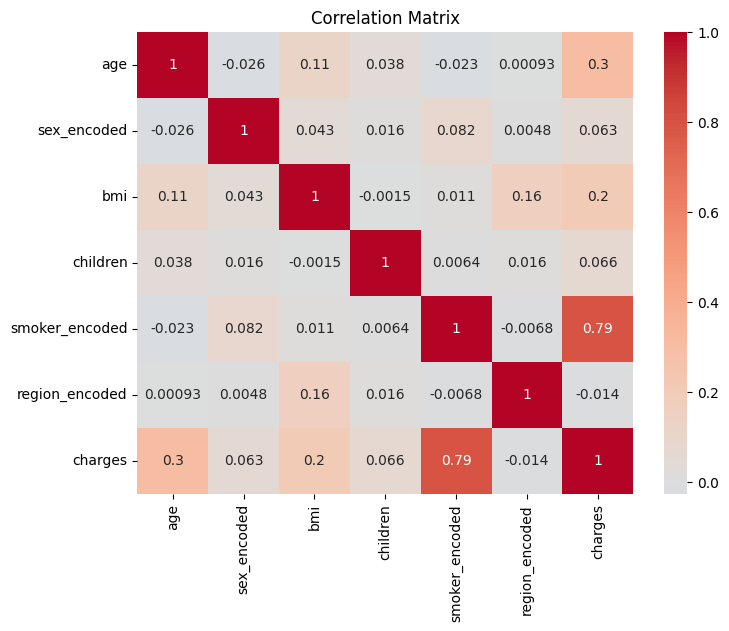

In [11]:
# Final correlation matrix
correlation_data = df_processed[features + ['charges']]
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Summary

**Dataset Overview:**
- Total records: 2,772 insurance policies (larger than expected)
- No missing values found
- Target: Insurance charges (continuous, wide range $1,121 - $63,770)

**Key Findings from Real Data:**
- **Smoking status** shows the most dramatic impact on charges (smokers pay ~3x more)
- **Age distribution**: 18-64 years, fairly even distribution
- **Gender balance**: Nearly equal male/female split (50.5% male, 49.5% female)
- **Regional distribution**: Fairly balanced across 4 regions
- **BMI range**: 15.96 - 53.13, with some high-BMI outliers
- **Children**: Most have 0-2 children, few have 3+ children

**Encoding Applied:**
- Sex: Female=0, Male=1
- Smoker: No=0, Yes=1  
- Region: Northeast=0, Northwest=1, Southeast=2, Southwest=3

**Data Quality:**
- Clean dataset with no preprocessing issues
- Ready for regression modeling

**Next Steps:**
- Apply feature scaling (age and BMI have different ranges)
- Train regression models (Linear, Random Forest, Gradient Boosting)
- Focus on smoking interaction effects
- Evaluate with RMSE, MAE, and R² scores